<img src="https://i.imgur.com/YX6UATs.png"  width="160">

# Tarefa7.1:Projeto - Visualização com Matplotlib

## Considerações iniciais

O objetivo deste notebook é fazer com que o leitor assimile os recursos de uma das bibliotecas mais importantes do Python: o Matplotlib. Para isso, exemplos e conceitos desta biblioteca serão apresentados ao longo da jornada. Concomitantemente, serão solicitadas algumas tarefas práticas ao leitor.

### Por que o Matplotlib?
Apesar do Python possuir um ecossitema de feramentas de visualização muito rico para o cientista de dados, o Matplotlib, sem dúvidas, também detém seu lugar de destaque.

> "Matplolib tenta facilitar as coisas fáceis e tornar as coisas difíceis possíveis."
>
> [Site do Matplotlib](https://matplotlib.org/)

Além do Matplotlib, utilizaremos, também, um conjunto de dados e outras bibliotecas de apoio, como o [Pandas](https://pandas.pydata.org/), por exemplo. Afinal, o Matplotlib é ótimo, mas não brilha sozinho.

### Prepare seu ambiente

Se necessário, faça a instalação da biblioteca no seu sistema usando o gerenciador de pacotes da linguagem, no prompt/terminal/cmd digite:
```
$ pip install matplotlib
```

Ou caso esteja usando o Anaconda:
```
$ conda install matplotlib
```

### Conjunto de dados
O conjunto de dados utilizado são os registros de milhares de lutas no Ultimate Fight Championship (UFC). O arquivo [ufc.csv](ufc.csv) possui mais de 145 colunas, o que é demasiadamente grande para as nossas intenções. Deste modo, iremos focar apenas uma parte dos dados.

#### Descrição do dados

De todas as colunas do arquivo [ufc.csv](ufc.csv), iremos praticar com:
- R_fighter: Nome do lutador do canto vermelho.
- B_fighter: Nome do lutador do canto azul.
- Referee: Nome do árbitro da luta.
- date: Data do evento
- location: Local do evento.
- Winner: Cor do vencedor - Red ou Blue.
- title_bout: Se é uma disputa pelo título.
- weight_class: Classe de peso da luta.

## Procedimentos

Vamos abordar alguns padrões básicos de uso e práticas recomendadas para ajudar você a utilizar o Matplotlib. Por ter um código bastante extenso, o Matplotlib pode ser um desafio ultrajante (e é) para os iniciantes, mas não se intimide. A intenção deste guia é, justamente, focar no essencial para plotagem dos primeiros gráficos sem necessitar de muita informação.

### Importando as bibliotecas
- **%matplotlib inline**: é uma *Magic Word* do Jupyter Notebook que informa à plataforma que informa ao Jupyter para que os gráficos sejam plotados diratemente no notebook.
- **numpy**: Uma biblioteca de apoio para gerar alguns dados para plotagem.
- **pandas**: A biblioteca pandas fornece estruturas e ferramentas de análise de dados. Iremos utilizá-la para carregar e manipular o conjunto de dados em uma estrutura chamada *dataframe*. Por convenção, recomenda-se o pandas seja utilizado com o nome *pd*.
- **matplotlib.pyplot**: A estrela de hoje. Por convenção, recomenda-se que matplotlib.pyplot seja acessado via pelo nome *plt*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### TAREFA 01
1. Importe o arquivo [ufc.csv](ufc.csv) em um dataframe.
2. Visualize as primeiras 5 linhas do dataframe

In [2]:
# Insira seu código aqui

arq = 'ufc.csv'
ufc_df = pd.read_csv(arq)
ufc_df.head(5)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
# Resultado esperado (não modifique esta célula)

### Diferenças entre os métodos plt.show() e plt.plot()
Caso você esteja executando matplotlib a partir do script Python, use o *plt.show()* em qualquer plotagem. Porém, no nosso caso, rodando a partir do notebook, nosso trabalho poderá ser realizado apenas com *plt.plot()*. Não se esqueça que para isso, ativamos a opção de apresentar os gráficos diretamente no notebook através do comando *%matplotlib inline*.

### A anatomia de um gráfico

O Matplotlib é baseado no conceito de que todos os elementos que constituem um gráfico estão organizados dentro de uma hierarquia. No topo desta hirarquia está o ambiente do Matplotlib, fornecido pelo módulo que importamos anteriormente - __matplotlib.pyplot__. A partir dele, o usuário acessa funções que adicionam elementos nos gráficos (linhas, imagens, legendas, etc).

Descendo na hirarquia, o usuário poderá utilizar objetos que possuem funcionalidades. Por exemplo, uma figura é criada a partir de um objeto *Figure* ou um subgráfico em um gráfico é manipulado por um objeto *Axe*. Aliás, no fim das contas, para deixar o código mais "acessível", o usuário acaba sempre trabalhando com os objetos do Matplotlib.

Para esclarecer um pouco mais, observe a imagem abaixo. Nela, estão contidas os elementos que compoem um gráfico:
<center>
<img src='https://matplotlib.org/_images/anatomy.png' alt='Anatomia de um gráfico' width='600' height='600'/>
</center>

Não se preocupe em entender cada um dos elementos, o importante é ter a noção de que estes elementos possuem uma hierarquia na organização e que você deve obedecê-la durante a montagem de gráficos mais complexos.

#### Figure
O *Figure* é o elemento de mais alto nível do gráfico. Uma figura pode ter vários eixos (*Axes*), mas um eixo pode pertencer a somente uma figura. Além disso, o objeto *Figure* aceita parâmetros que formatam nosso gráfico.

### TAREFA 02
1. Instancie uma figura.
2. Use o *plt.plot()* para visualizar no notebook.

- **DICA**: O objeto *figure* está dentro do matplotlib.pyplot.
- **DICA**: Caso você não tenha usado o comando *%matplotlib inline*, a figura não aparecerá.

[]

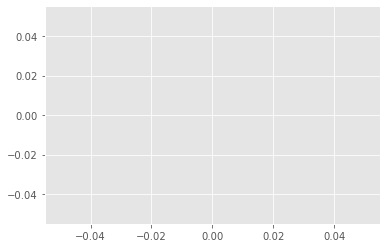

In [17]:
# Insira seu código aqui
fig, ax = plt.subplots()

plt.plot()

In [5]:
# Resultado esperado (não modifique esta célula)

### TAREFA 03
1. Instancie uma figura alterando seu tamanho.
2. Use o *plt.plot()* para visualizar no notebook.

- **DICA**: Use o parâmetro *figsize*.

[]

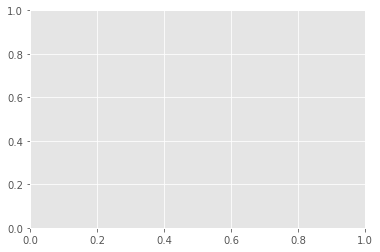

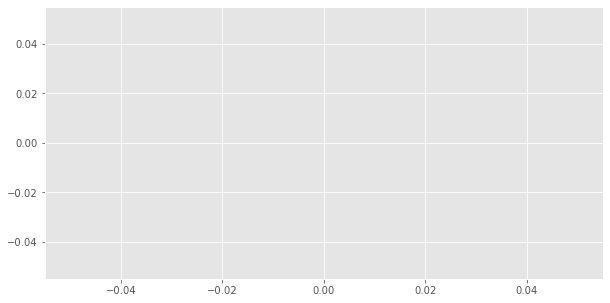

In [19]:
# Insira seu código aqui
fig, ax = plt.subplots()

plt.figure(figsize=(10, 5)) # largura, altura
plt.plot()


In [20]:
# Resultado esperado (não modifique esta célula)

#### Axe
Pense em um *Axe* como uma região da figura onde você plotará seus gráficos. Uma *Figure* pode ter vários *Axes*, mas um *Axe* pertence a uma só *Figure*. Para adicionar *Axes* à uma *Figure*, podemos utilizar os métodos *fig.add_axes()* ou *fig.add_subplot()*. Para esclarecer, *Axes* e *subplots* são a mesma coisa.

O método *fig.add_subplots()* usa 3 números inteiros como parâmetro. Esses três números definem o número de linhas e colunas e a posição do subplot na figura. Por exemplo, usando *fig.add_subplots(ijk)* adiciona um eixo na k-enésima posição de uma grade que possui i linhas e j colunas.

O método *fig.add_subplot()* é a maneira mais fácil de configurar seu layout, enquanto *fig.add_axes()* lhe dará mais controle sobre a posição dos seus eixos.

### TAREFA 04
1. Instancie uma figura
2. Adicione dois subplots lado a lado.
3. Não se esqueça do plot.plot()

**DICA**: Utilize o método *fig.add_axes()*.

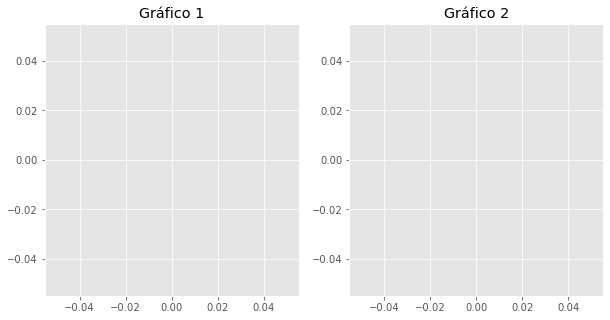

In [21]:
# create two subplots with the shared x and y axes
plt.style.use("ggplot")

# Define as configurações dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Dados para cada subplot
ax1.bar([],[],alpha=0.5)
ax2.bar([],[],alpha=1.0)

ax1.set(title="Gráfico 1")
ax2.set(title="Gráfico 2")

plt.show()

In [9]:
# Resultado esperado (não modifique esta célula)

Cada subplot contém dois eixos, representados pelos objetos *Axis* (observe a diferença entre *Axes* e *Axis*), que cuidam dos limites de cada subplot. As faixas de valores dos eixos podem ser controlados através dos métodos *axes.set_xlim()* e *axes.set_ylim()*.

### TAREFA 05
1. Altere os limites dos subplotes da figura anterior
2. Para o subplot da esquerda, configure o eixo x de 0 a 10.
3. No subplot da direita, defina y entre -1 e 1.
4. Adicione os títulos "Esquerda" e "Direita" nos subplots.

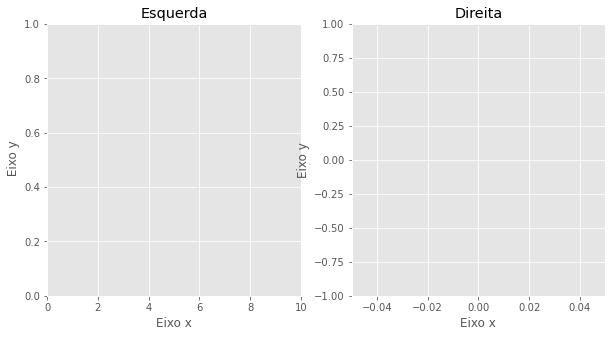

In [22]:
# Insira seu código aqui
# create two subplots with the shared x and y axes
plt.style.use("ggplot")

# Define as configurações dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Dados para cada subplot
ax1.bar([],[])
ax2.bar([],[])

ax1.set(title="Esquerda", xlabel="Eixo x", ylabel=" Eixo y", xlim=(0,10), ylim=(0,1))
ax2.set(title="Direita", xlabel="Eixo x", ylabel="Eixo y", xlim=(-5/100,5/100), ylim=(-1,1))

plt.show()

In [11]:
# Resultado esperado (não modifique esta célula)

Nossos subplots estão sobreajustados e o eixo y do subplot da direita está ruim de visualizar.

### TAREFA 06
1. Com base na figura anterior, ajuste o gráfico.
2. Ajuste o tamanho da figura.

**DICA**: Use o método *figure.tight_layout()*.

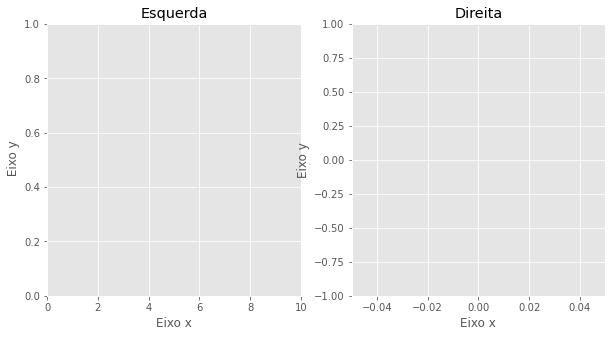

In [12]:
# Insira sua código aqui
# create two subplots with the shared x and y axes
plt.style.use("ggplot")

# Define as configurações dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Dados para cada subplot
ax1.bar([],[])
ax2.bar([],[])

ax1.set(title="Esquerda", xlabel="Eixo x", ylabel=" Eixo y", xlim=(0,10), ylim=(0,1))
ax2.set(title="Direita", xlabel="Eixo x", ylabel="Eixo y", xlim=(-5/100,5/100), ylim=(-1,1))

plt.show()

In [13]:
# Resultado esperado (não modifique esta célula)

Bem melhor não é? Percebeu como os objetos (*Figure*, *Axes*, etc) são utilizados na montagem do gráfico? E como os atritutos (*figsize*) e métodos (*tight_layout()*, *set_title()*, *set_xlim()*, etc) destes objetos são utilizados para alterar a estética do grafico?

Os recursos do Matplotlib são vastos, mas o conceito de hierarquia de elementos das figuras e a interação destes elementos farão você chegar à qualquer lugar na hora de montar seu gráfico.

### Plotando seus gráficos

*   List item
*   List item


Vamos voltar ao conjunto de dados do UFC que carregamos mais cedo. Afinal, o Matplotlib é somente uma tela em branco quando você não tem o que desenhar.

A variável *fights_by_year* armazena a quantidade de lutas por ano do evento. Apesar deste notebook não pretender ensinar Pandas, é altamente recomendável que você não tenha dúvida sobre o que foi feito na célula abaixo.

In [14]:
ufc_df.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [23]:
ufc_df.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak',
       ...
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=145)

### TAREFA 07
1. Plote a evolução das quantidades de lutas por ano no UFC.
2. Use um gráfico de linha.
3. Configure título e nome dos eixos x e y.

In [24]:
# Insira sua código aqui
ufc_df['date']

0       2019-06-08
1       2019-06-08
2       2019-06-08
3       2019-06-08
4       2019-06-08
           ...    
5139    1993-11-12
5140    1993-11-12
5141    1993-11-12
5142    1993-11-12
5143    1993-11-12
Name: date, Length: 5144, dtype: object

In [25]:
# Transformando a coluna date em objeto datetime e agrupando as lutas por ano.
ufc_df['date'] = pd.to_datetime(ufc_df['date'])
ufc_df_by_year = ufc_df.groupby(ufc_df['date'].dt.year).size()

ufc_df_by_year

date
1993      8
1994     29
1995     33
1996     36
1997     39
1998     20
1999     43
2000     41
2001     40
2002     53
2003     41
2004     39
2005     80
2006    158
2007    171
2008    201
2009    215
2010    253
2011    300
2012    341
2013    386
2014    503
2015    473
2016    493
2017    451
2018    474
2019    223
dtype: int64

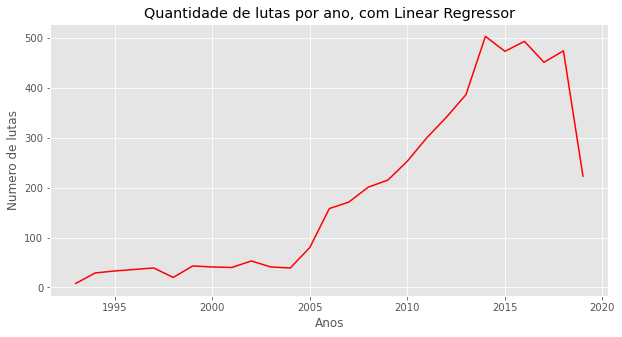

In [69]:
plt.figure(figsize=(10,5))
plt.plot(ufc_df_by_year, color="red") # Plotando o grafico de de uma reta

plt.xlabel("Anos")              # Definindo o nome do Eixo x
plt.ylabel("Numero de lutas") # Definindo o nome do Eixo y
plt.title("Quantidade de lutas por ano, com Linear Regressor") # Definindo o titulo
plt.show;

In [30]:
# Resultado esperado (não modifique esta célula)
ufc_df.columns


Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak',
       ...
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=145)

### Matplotlib e pandas
A biblioteca Pandas possui integração com o Matplotlib, permitindo que sejam criados gráficos diretamente dos dataframes do Pandas. Se você quiser plotar as informações de forma mais rápida, basta utilizar o método *plot()* do próprio dataframe.

Separamos as 10 classes de peso mais relevantes - maior quantidade de lutas - do UFC ao longo dos anos.

In [32]:
fights_by_class = ufc_df['weight_class'].value_counts()[:10]
fights_by_class

Lightweight             989
Welterweight            969
Middleweight            725
Heavyweight             507
Light Heavyweight       502
Featherweight           442
Bantamweight            379
Flyweight               187
Women's Strawweight     143
Women's Bantamweight    111
Name: weight_class, dtype: int64

In [59]:
ufc_df.shape

(5144, 145)

In [66]:
fights_by_class.iloc[9]


111

### TAREFA 08
1. Plote a quantidade de lutas das 10 classes de peso mais relevantes do UFC.
2. Use um gráfico de barra diretamente do dataframe.
3. Armazene seu plot em um objeto *Axe*.
4. Configure título e nome dos eixos x e y.

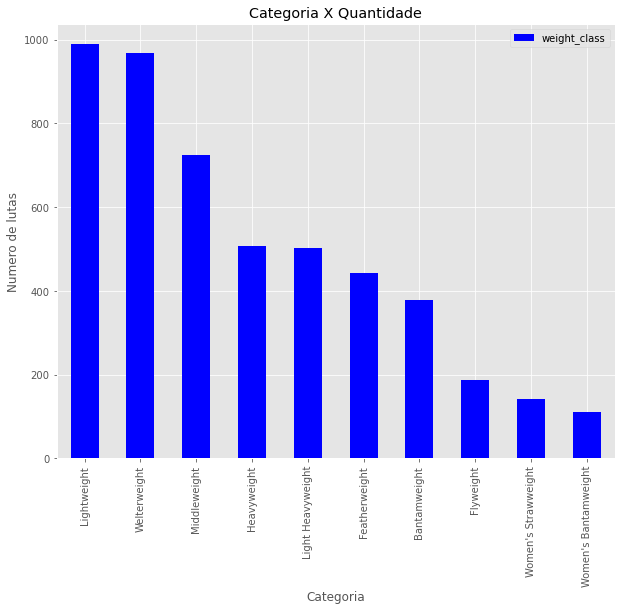

In [81]:
# Insira sua código aqui

axe_df=pd.DataFrame(fights_by_class, index=fights_by_class.index)

axe_df.plot(kind="bar",stacked=True, color="blue", figsize=(10,8))
plt.xlabel("Categoria")              # Definindo o nome do Eixo x
plt.ylabel("Numero de lutas") # Definindo o nome do Eixo y
plt.title("Categoria X Quantidade") # Definindo o titulo
plt.show;

In [ ]:
# Resultado esperado (não modifique esta célula)

## Conclusão
Matplotlib é, provavelmente, o pacote Python mais utilizado para gráficos 2D. Ele fornece uma maneira muito rápida de visualizar os dados de Python e figuras de qualidade de publicação em vários formatos. Em conjunto com outras ferramentas, como Pandas e Seaborn (este é um complemento ao Matplotlib), os cientistas de dados tem um grande aliado.

### Awari -  <a href="https://awari.com.br/"> awari.com.br</a>